Creamos dataset para los datos de data analyst, data scientist, data engineer y machine learning engineer y los años 21,22,23 y 24

In [1]:
import pandas as pd

# Definir el conjunto de datos original
data = pd.read_csv("salaries.csv")

# Filtrar el conjunto de datos para los roles específicos y años específicos
roles = ["Data Analyst", "Data Scientist", "Data Engineer", "Machine Learning Engineer"]
years = [2021, 2022, 2023, 2024]

filtered_data = data[(data['job_title'].isin(roles)) & (data['work_year'].isin(years))]


# Guardar el nuevo conjunto de datos en un archivo CSV con un nombre descriptivo
filtered_data.to_csv("puestos_mas_demandados.csv", index=False)


In [2]:
# Mostrar las primeras filas del nuevo conjunto de datos para verificar
filtered_data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2024,MI,FT,Data Scientist,172000,USD,172000,US,0,US,M
2,2024,MI,FT,Data Scientist,75600,USD,75600,US,0,US,M
3,2024,MI,FT,Machine Learning Engineer,265400,USD,265400,US,0,US,M
4,2024,MI,FT,Machine Learning Engineer,127400,USD,127400,US,0,US,M
7,2024,EN,FT,Data Scientist,175100,USD,175100,US,0,US,M


In [3]:
# Mostrar las primeras filas del nuevo conjunto de datos para verificar
filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10262 entries, 1 to 15479
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10262 non-null  int64 
 1   experience_level    10262 non-null  object
 2   employment_type     10262 non-null  object
 3   job_title           10262 non-null  object
 4   salary              10262 non-null  int64 
 5   salary_currency     10262 non-null  object
 6   salary_in_usd       10262 non-null  int64 
 7   employee_residence  10262 non-null  object
 8   remote_ratio        10262 non-null  int64 
 9   company_location    10262 non-null  object
 10  company_size        10262 non-null  object
dtypes: int64(4), object(7)
memory usage: 962.1+ KB


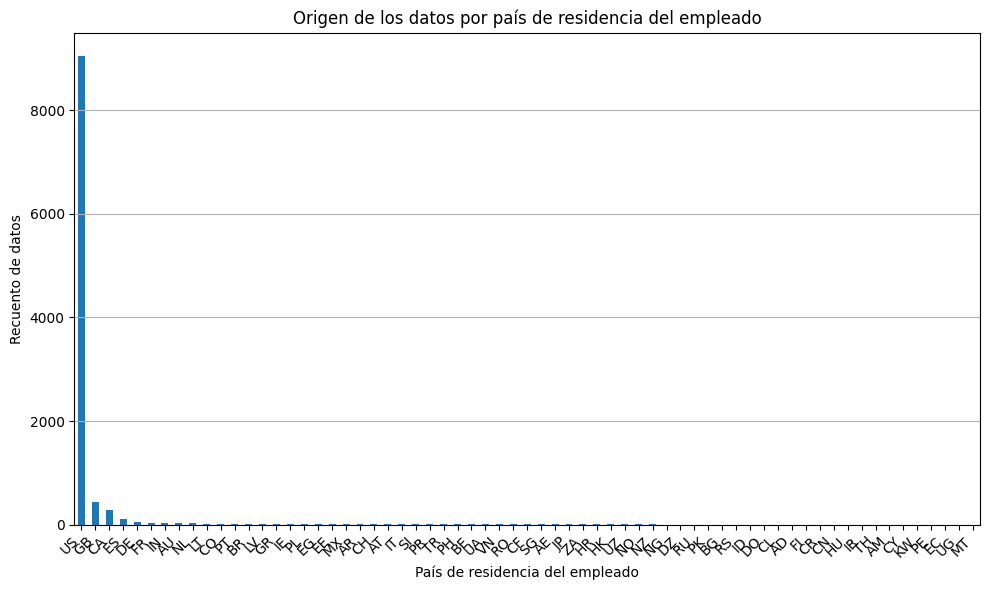

In [4]:
import matplotlib.pyplot as plt

# Calcular el recuento de datos por país de residencia
recuento_por_pais_residencia = filtered_data['employee_residence'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
recuento_por_pais_residencia.plot(kind='bar')
plt.title('Origen de los datos por país de residencia del empleado')
plt.xlabel('País de residencia del empleado')
plt.ylabel('Recuento de datos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar el diagrama
plt.show()


In [5]:
# Calcular el recuento de datos por año
recuento_por_año = filtered_data['work_year'].value_counts().sort_index()

# Mostrar el recuento de datos por año
print(recuento_por_año)


work_year
2021     115
2022    1272
2023    5795
2024    3080
Name: count, dtype: int64


In [6]:
# Filtrar el conjunto de datos para el año 2021
data_2021 = filtered_data[filtered_data['work_year'] == 2021]

# Calcular el recuento de datos por título de trabajo y nivel de experiencia
recuento_por_puesto_y_experiencia_2021 = data_2021.groupby(['job_title', 'experience_level']).size()

# Mostrar el recuento por título de trabajo y nivel de experiencia para 2021
print(recuento_por_puesto_y_experiencia_2021)


job_title                  experience_level
Data Analyst               EN                   6
                           MI                   8
                           SE                   6
Data Engineer              EN                   6
                           MI                  20
                           SE                  11
Data Scientist             EN                   9
                           MI                  23
                           SE                   8
Machine Learning Engineer  EN                   6
                           MI                   6
                           SE                   6
dtype: int64


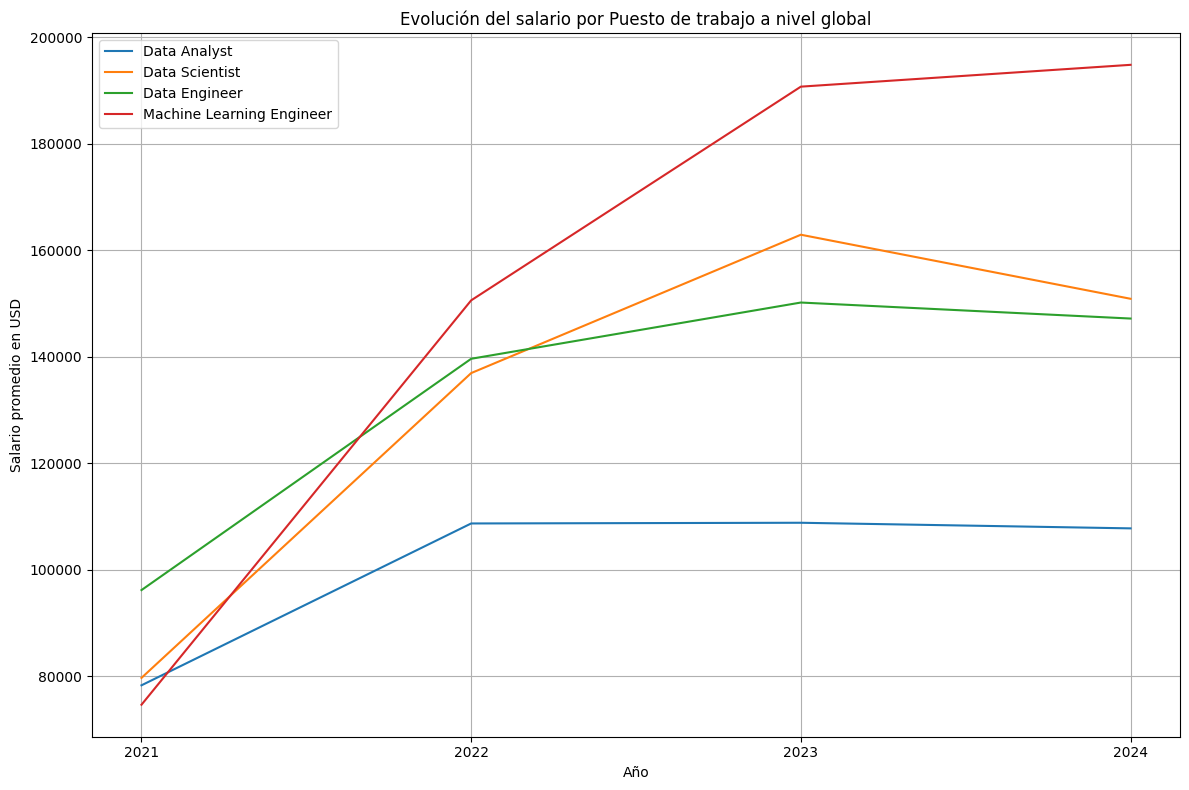

In [7]:
import matplotlib.pyplot as plt

# Agrupar los datos por año y título de trabajo y calcular el salario promedio en USD
salario_promedio_por_año_y_puesto = filtered_data.groupby(['work_year', 'job_title'])['salary_in_usd'].mean()

# Crear un gráfico para cada título de trabajo
fig, ax = plt.subplots(figsize=(12, 8))

for puesto in roles:
    salario_puesto = salario_promedio_por_año_y_puesto[:, puesto]
    ax.plot(salario_puesto.index, salario_puesto.values, label=puesto)

# Agregar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Salario promedio en USD')
ax.set_title('Evolución del salario por Puesto de trabajo a nivel global')
ax.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()


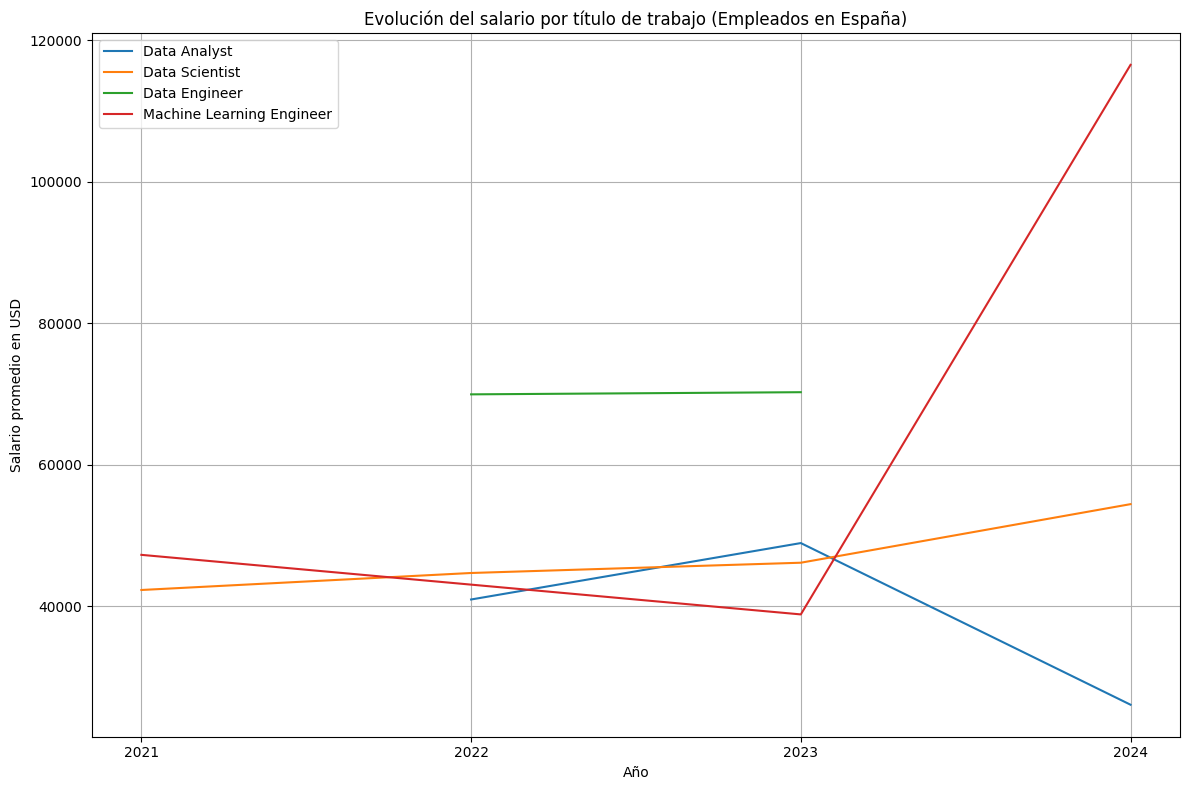

In [8]:
import matplotlib.pyplot as plt

# Filtrar los datos para los empleados que residen en España
filtered_data_spain = filtered_data[filtered_data['employee_residence'] == 'ES']

# Agrupar los datos por año y título de trabajo y calcular el salario promedio en USD
salario_promedio_por_año_y_puesto_spain = filtered_data_spain.groupby(['work_year', 'job_title'])['salary_in_usd'].mean()

# Crear un gráfico para cada título de trabajo
fig, ax = plt.subplots(figsize=(12, 8))

for puesto in roles:
    salario_puesto_spain = salario_promedio_por_año_y_puesto_spain[:, puesto]
    ax.plot(salario_puesto_spain.index, salario_puesto_spain.values, label=puesto)

# Agregar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Salario promedio en USD')
ax.set_title('Evolución del salario por título de trabajo (Empleados en España)')
ax.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()


In [9]:
# Filtrar los datos para los empleados que residen en España
filtered_data_spain = filtered_data[filtered_data['employee_residence'] == 'ES']

# Calcular el recuento de datos por año, puesto y nivel de experiencia
recuento_por_puesto_y_experiencia_spain = filtered_data_spain.groupby(['work_year', 'job_title', 'experience_level']).size()

# Mostrar el recuento por año, puesto y nivel de experiencia para España
print(recuento_por_puesto_y_experiencia_spain)


work_year  job_title                  experience_level
2021       Data Scientist             MI                   2
           Machine Learning Engineer  MI                   1
2022       Data Analyst               EN                   1
                                      MI                   2
                                      SE                   8
           Data Engineer              MI                   6
                                      SE                   9
           Data Scientist             EN                   1
                                      SE                  15
2023       Data Analyst               SE                   6
           Data Engineer              EN                   1
                                      MI                   6
                                      SE                   2
           Data Scientist             EN                   2
                                      MI                   3
                              

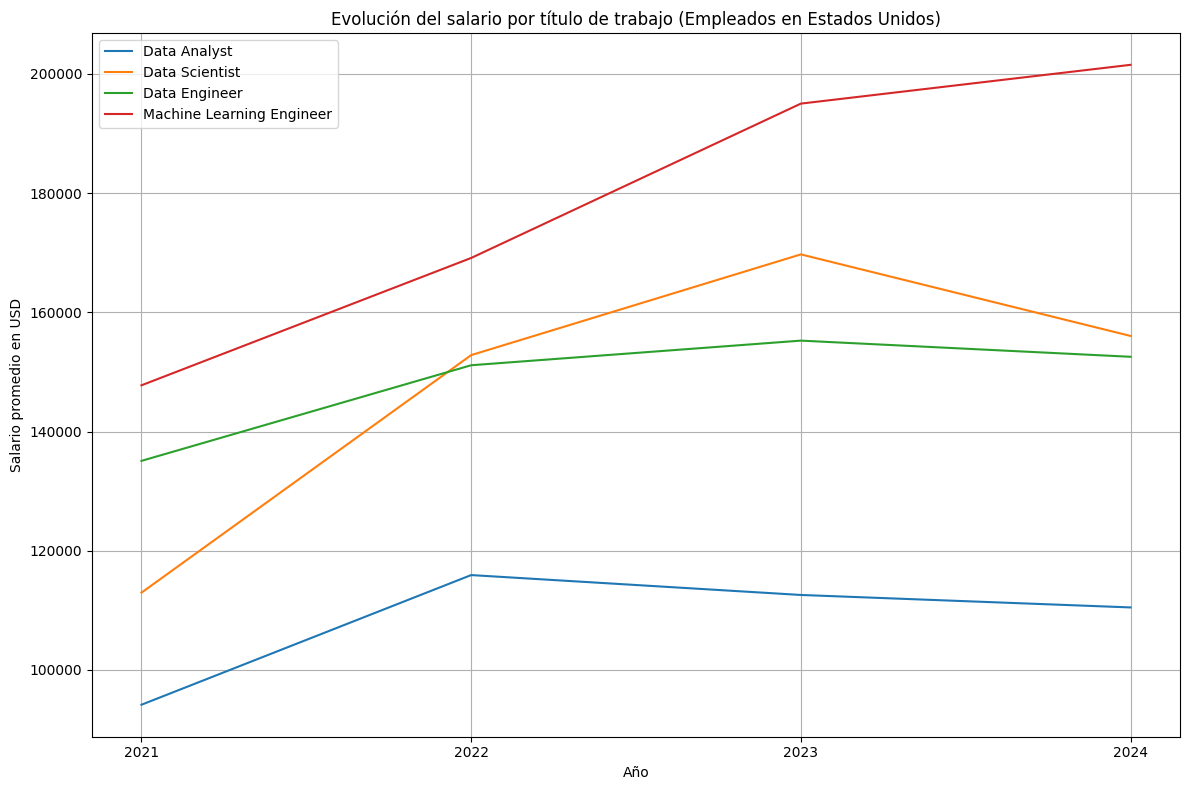

In [10]:
import matplotlib.pyplot as plt

# Filtrar los datos para los empleados que residen en Estados Unidos
filtered_data_us = filtered_data[filtered_data['employee_residence'] == 'US']

# Agrupar los datos por año y título de trabajo y calcular el salario promedio en USD
salario_promedio_por_año_y_puesto_us = filtered_data_us.groupby(['work_year', 'job_title'])['salary_in_usd'].mean()

# Crear un gráfico para cada título de trabajo
fig, ax = plt.subplots(figsize=(12, 8))

for puesto in roles:
    salario_puesto_us = salario_promedio_por_año_y_puesto_us[:, puesto]
    ax.plot(salario_puesto_us.index, salario_puesto_us.values, label=puesto)

# Agregar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Salario promedio en USD')
ax.set_title('Evolución del salario por título de trabajo (Empleados en Estados Unidos)')
ax.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()


In [11]:
# Filtrar los datos para el lugar de residencia en Estados Unidos
filtered_data_us = filtered_data[filtered_data['employee_residence'] == 'US']

# Calcular el recuento de datos por puesto y nivel de experiencia
recuento_por_puesto_y_experiencia_us = filtered_data_us.groupby(['job_title', 'experience_level']).size()

# Mostrar el recuento por puesto y nivel de experiencia para Estados Unidos
print(recuento_por_puesto_y_experiencia_us)


job_title                  experience_level
Data Analyst               EN                   410
                           EX                    22
                           MI                   458
                           SE                  1126
Data Engineer              EN                    96
                           EX                   140
                           MI                   644
                           SE                  2006
Data Scientist             EN                    94
                           EX                    32
                           MI                   587
                           SE                  2002
Machine Learning Engineer  EN                    33
                           EX                    18
                           MI                   190
                           SE                  1186
dtype: int64


In [12]:
# Filtrar los datos para el año 2021 y empleados que residen en Estados Unidos
data_2021_us = filtered_data[(filtered_data['work_year'] == 2021) & (filtered_data['employee_residence'] == 'US')]

# Calcular el recuento de datos por puesto y nivel de experiencia
recuento_por_puesto_y_experiencia_us_2021 = data_2021_us.groupby(['job_title', 'experience_level']).size()

# Mostrar el recuento por puesto y nivel de experiencia para 2021 en Estados Unidos
print(recuento_por_puesto_y_experiencia_us_2021)


job_title                  experience_level
Data Analyst               EN                  4
                           MI                  6
                           SE                  2
Data Engineer              EN                  2
                           MI                  9
                           SE                  8
Data Scientist             EN                  5
                           MI                  8
                           SE                  2
Machine Learning Engineer  EN                  2
                           SE                  2
dtype: int64


In [13]:
# Filtrar el conjunto de datos para los años 2022, 2023 y 2024
data_2022_2024 = filtered_data[filtered_data['work_year'].isin([2022, 2023, 2024])]

# Mostrar las primeras filas del nuevo conjunto de datos para verificar
print(data_2022_2024.head())

# Guardar el nuevo conjunto de datos en un archivo CSV
data_2022_2024.to_csv("filtered_data_2022_2024.csv", index=False)


   work_year experience_level employment_type                  job_title  \
1       2024               MI              FT             Data Scientist   
2       2024               MI              FT             Data Scientist   
3       2024               MI              FT  Machine Learning Engineer   
4       2024               MI              FT  Machine Learning Engineer   
7       2024               EN              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
1  172000             USD         172000                 US             0   
2   75600             USD          75600                 US             0   
3  265400             USD         265400                 US             0   
4  127400             USD         127400                 US             0   
7  175100             USD         175100                 US             0   

  company_location company_size  
1               US            M  
2           

In [14]:
# Filtrar el conjunto de datos para los empleados en Estados Unidos y España
data_us_es = data_2022_2024[data_2022_2024['employee_residence'].isin(['US', 'ES'])]

# Calcular la media de salarios en USD por nivel de experiencia, puesto, país y año
media_salarios_por_experiencia_puesto_y_pais = data_us_es.groupby(['work_year', 'experience_level', 'job_title', 'employee_residence'])['salary_in_usd'].mean().round(2).unstack()

# Mostrar la tabla resultante
print(media_salarios_por_experiencia_puesto_y_pais)




employee_residence                                           ES         US
work_year experience_level job_title                                      
2022      EN               Data Analyst                25216.00   61368.89
                           Data Engineer                    NaN  126315.79
                           Data Scientist              31520.00  106651.60
                           Machine Learning Engineer        NaN  127200.00
          EX               Data Analyst                     NaN  120000.00
                           Data Engineer                    NaN  234700.00
                           Data Scientist                   NaN  144500.00
          MI               Data Analyst                36773.00  115875.81
                           Data Engineer               70919.67  123904.33
                           Data Scientist                   NaN  130356.00
                           Machine Learning Engineer        NaN  140355.56
          SE             

In [15]:
# Filtrar el conjunto de datos para los empleados en Estados Unidos y España y solo para entry level
data_us_es_entry_level = data_2022_2024[(data_2022_2024['experience_level'] == 'EN') & data_2022_2024['employee_residence'].isin(['US', 'ES'])]

# Calcular la media de salarios en USD por puesto, país y año solo para entry level
media_salarios_entry_level_por_puesto_y_pais = data_us_es_entry_level.groupby(['work_year', 'job_title', 'employee_residence'])['salary_in_usd'].mean().round(2).unstack()

# Mostrar la tabla resultante
print(media_salarios_entry_level_por_puesto_y_pais)


employee_residence                        ES         US
work_year job_title                                    
2022      Data Analyst               25216.0   61368.89
          Data Engineer                  NaN  126315.79
          Data Scientist             31520.0  106651.60
          Machine Learning Engineer      NaN  127200.00
2023      Data Analyst                   NaN   83886.77
          Data Engineer              41027.0   99058.98
          Data Scientist             37248.5  106845.31
          Machine Learning Engineer      NaN  117420.12
2024      Data Analyst               26110.5   95156.69
          Data Engineer                  NaN  119015.73
          Data Scientist                 NaN  106756.73
          Machine Learning Engineer      NaN  126487.50


In [16]:
# Calcular el porcentaje de aumento en salario para cada puesto y año
porcentaje_aumento_salario = (((media_salarios_entry_level_por_puesto_y_pais['US'] - media_salarios_entry_level_por_puesto_y_pais['ES']) / media_salarios_entry_level_por_puesto_y_pais['ES']) * 100).round(2)

# Mostrar el porcentaje de aumento
print(porcentaje_aumento_salario)


work_year  job_title                
2022       Data Analyst                 143.37
           Data Engineer                   NaN
           Data Scientist               238.36
           Machine Learning Engineer       NaN
2023       Data Analyst                    NaN
           Data Engineer                141.45
           Data Scientist               186.84
           Machine Learning Engineer       NaN
2024       Data Analyst                 264.44
           Data Engineer                   NaN
           Data Scientist                  NaN
           Machine Learning Engineer       NaN
dtype: float64


In [17]:
# Filtrar el conjunto de datos para los empleados en Estados Unidos y España y solo para MI
data_us_es_entry_level = data_2022_2024[(data_2022_2024['experience_level'] == 'MI') & data_2022_2024['employee_residence'].isin(['US', 'ES'])]

# Calcular la media de salarios en USD por puesto, país y año solo para entry level
media_salarios_entry_level_por_puesto_y_pais = data_us_es_entry_level.groupby(['work_year', 'job_title', 'employee_residence'])['salary_in_usd'].mean().round(2).unstack()

# Mostrar la tabla resultante
print(media_salarios_entry_level_por_puesto_y_pais)

employee_residence                          ES         US
work_year job_title                                      
2022      Data Analyst                36773.00  115875.81
          Data Engineer               70919.67  123904.33
          Data Scientist                   NaN  130356.00
          Machine Learning Engineer        NaN  140355.56
2023      Data Analyst                     NaN   99299.20
          Data Engineer               74873.00  132774.87
          Data Scientist              57582.67  137889.64
          Machine Learning Engineer   38868.00  177718.05
2024      Data Analyst                     NaN  105235.62
          Data Engineer                    NaN  128797.82
          Data Scientist                   NaN  137933.23
          Machine Learning Engineer  116499.50  172483.31


In [18]:
# Filtrar el conjunto de datos para los empleados en Estados Unidos y España y solo para SE
data_us_es_entry_level = data_2022_2024[(data_2022_2024['experience_level'] == 'SE') & data_2022_2024['employee_residence'].isin(['US', 'ES'])]

# Calcular la media de salarios en USD por puesto, país y año solo para entry level
media_salarios_entry_level_por_puesto_y_pais = data_us_es_entry_level.groupby(['work_year', 'job_title', 'employee_residence'])['salary_in_usd'].mean().round(2).unstack()

# Mostrar la tabla resultante
print(media_salarios_entry_level_por_puesto_y_pais)

employee_residence                         ES         US
work_year job_title                                     
2022      Data Analyst               43996.50  118968.54
          Data Engineer              69307.78  152789.64
          Data Scientist             45598.93  158173.30
          Machine Learning Engineer       NaN  176427.16
2023      Data Analyst               48944.83  122379.46
          Data Engineer              71024.00  161172.88
          Data Scientist             45673.24  177401.45
          Machine Learning Engineer       NaN  198034.05
2024      Data Analyst                    NaN  129829.62
          Data Engineer                   NaN  164843.91
          Data Scientist             54444.00  170334.02
          Machine Learning Engineer       NaN  210327.78


In [19]:
# Filtrar el conjunto de datos para los empleados en GB y España y solo para entry level
data_us_es_entry_level = data_2022_2024[(data_2022_2024['experience_level'] == 'EN') & data_2022_2024['employee_residence'].isin(['GB', 'ES'])]

# Calcular la media de salarios en USD por puesto, país y año solo para entry level
media_salarios_entry_level_por_puesto_y_pais = data_us_es_entry_level.groupby(['work_year', 'job_title', 'employee_residence'])['salary_in_usd'].mean().round(2).unstack()

# Mostrar la tabla resultante
print(media_salarios_entry_level_por_puesto_y_pais)

employee_residence                        ES        GB
work_year job_title                                   
2022      Data Analyst               25216.0       NaN
          Data Engineer                  NaN  50792.00
          Data Scientist             31520.0  33246.00
          Machine Learning Engineer      NaN  40167.67
2023      Data Analyst                   NaN  55220.83
          Data Engineer              41027.0  59469.33
          Data Scientist             37248.5  89737.00
2024      Data Analyst               26110.5  50418.75
          Data Engineer                  NaN  43750.00
          Data Scientist                 NaN  33500.00


In [20]:
# Filtrar el conjunto de datos para los empleados en GB y España y solo para MI
data_us_es_entry_level = data_2022_2024[(data_2022_2024['experience_level'] == 'MI') & data_2022_2024['employee_residence'].isin(['GB', 'ES'])]

# Calcular la media de salarios en USD por puesto, país y año solo para entry level
media_salarios_entry_level_por_puesto_y_pais = data_us_es_entry_level.groupby(['work_year', 'job_title', 'employee_residence'])['salary_in_usd'].mean().round(2).unstack()

# Mostrar la tabla resultante
print(media_salarios_entry_level_por_puesto_y_pais)

employee_residence                          ES         GB
work_year job_title                                      
2022      Data Analyst                36773.00  112872.00
          Data Engineer               70919.67   85049.68
          Data Scientist                   NaN   87776.07
          Machine Learning Engineer        NaN  104416.60
2023      Data Analyst                     NaN   76862.09
          Data Engineer               74873.00   77959.90
          Data Scientist              57582.67   79475.88
          Machine Learning Engineer   38868.00  108383.47
2024      Data Analyst                     NaN   46875.00
          Data Engineer                    NaN   58311.05
          Data Scientist                   NaN  105545.38
          Machine Learning Engineer  116499.50   56250.00


In [21]:
# Filtrar el conjunto de datos para el nivel de entrada (entry level), puesto "Data Analyst" y años 2023 y 2024 en España
data_entry_level_es_data_analyst = data_2022_2024[(data_2022_2024['experience_level'] == 'EN') & 
                                                  (data_2022_2024['job_title'] == 'Data Analyst') &
                                                  (data_2022_2024['employee_residence'] == 'ES') &
                                                  (data_2022_2024['work_year'].isin([2023, 2024]))]

# Calcular la media
media_salario = data_entry_level_es_data_analyst['salary_in_usd'].mean()

# Calcular la mediana
mediana_salario = data_entry_level_es_data_analyst['salary_in_usd'].median()

# Calcular la moda
moda_salario = data_entry_level_es_data_analyst['salary_in_usd'].mode()[0]  # Tomar el primer valor de la moda

# Calcular el mínimo
min_salario = data_entry_level_es_data_analyst['salary_in_usd'].min()

# Calcular el máximo
max_salario = data_entry_level_es_data_analyst['salary_in_usd'].max()

# Mostrar los resultados
print("Media del salario en USD:", media_salario)
print("Mediana del salario en USD:", mediana_salario)
print("Moda del salario en USD:", moda_salario)
print("Mínimo del salario en USD:", min_salario)
print("Máximo del salario en USD:", max_salario)


Media del salario en USD: 26110.5
Mediana del salario en USD: 26110.5
Moda del salario en USD: 23333
Mínimo del salario en USD: 23333
Máximo del salario en USD: 28888


In [22]:
# Filtrar el conjunto de datos para el nivel de entrada (entry level), puesto "Data Analyst" y años 2023 y 2024 en España
data_entry_level_es_data_analyst = data_2022_2024[(data_2022_2024['experience_level'] == 'EN') & 
                                                  (data_2022_2024['job_title'] == 'Data Analyst') &
                                                  (data_2022_2024['employee_residence'] == 'ES') &
                                                  (data_2022_2024['work_year'].isin([2023, 2024]))]

# Filtrar por la moneda especificada ('EUR' por ejemplo)
data_entry_level_es_data_analyst_eur = data_entry_level_es_data_analyst[data_entry_level_es_data_analyst['salary_currency'] == 'EUR']

# Calcular la media
media_salario_eur = data_entry_level_es_data_analyst_eur['salary'].mean()

# Calcular la mediana
mediana_salario_eur = data_entry_level_es_data_analyst_eur['salary'].median()

# Calcular la moda
moda_salario_eur = data_entry_level_es_data_analyst_eur['salary'].mode()[0]  # Tomar el primer valor de la moda

# Calcular el mínimo
min_salario_eur = data_entry_level_es_data_analyst_eur['salary'].min()

# Calcular el máximo
max_salario_eur = data_entry_level_es_data_analyst_eur['salary'].max()

# Mostrar los resultados
print("Media del salario en EUR:", media_salario_eur)
print("Mediana del salario en EUR:", mediana_salario_eur)
print("Moda del salario en EUR:", moda_salario_eur)
print("Mínimo del salario en EUR:", min_salario_eur)
print("Máximo del salario en EUR:", max_salario_eur)


Media del salario en EUR: 23500.0
Mediana del salario en EUR: 23500.0
Moda del salario en EUR: 21000
Mínimo del salario en EUR: 21000
Máximo del salario en EUR: 26000


Los resultados son comparables a los que encontramos en otras fuentes como Glassdoor, 20 mil € - 27 mil €/año, para analista de datos junior en España.


In [23]:
# Lista de puestos
puestos = ["Data Scientist", "Data Engineer", "Machine Learning Engineer"]

# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Iterar sobre los puestos
for puesto in puestos:
    # Filtrar el conjunto de datos para el nivel de entrada (entry level), puesto y años 2023 y 2024 en España
    data_entry_level_es_puesto = data_2022_2024[(data_2022_2024['experience_level'] == 'EN') & 
                                                (data_2022_2024['job_title'] == puesto) &
                                                (data_2022_2024['employee_residence'] == 'ES') &
                                                (data_2022_2024['work_year'].isin([2023, 2024]))]
    
    # Filtrar por la moneda especificada ('EUR' por ejemplo)
    data_entry_level_es_puesto_eur = data_entry_level_es_puesto[data_entry_level_es_puesto['salary_currency'] == 'EUR']
    
    # Calcular las métricas
    media_salario_eur = data_entry_level_es_puesto_eur['salary'].mean()
    mediana_salario_eur = data_entry_level_es_puesto_eur['salary'].median()
    moda_salario_eur = data_entry_level_es_puesto_eur['salary'].mode()[0] if not data_entry_level_es_puesto_eur.empty else None
    min_salario_eur = data_entry_level_es_puesto_eur['salary'].min()
    max_salario_eur = data_entry_level_es_puesto_eur['salary'].max()
    
    # Almacenar los resultados en el diccionario
    resultados[puesto] = {
        'Media (EUR)': media_salario_eur,
        'Mediana (EUR)': mediana_salario_eur,
        'Moda (EUR)': moda_salario_eur,
        'Mínimo (EUR)': min_salario_eur,
        'Máximo (EUR)': max_salario_eur
    }

# Mostrar los resultados
import pandas as pd
resultados_df = pd.DataFrame(resultados)
print(resultados_df)


               Data Scientist  Data Engineer  Machine Learning Engineer
Media (EUR)           34500.0        38000.0                        NaN
Mediana (EUR)         34500.0        38000.0                        NaN
Moda (EUR)            29000.0        38000.0                        NaN
Mínimo (EUR)          29000.0        38000.0                        NaN
Máximo (EUR)          40000.0        38000.0                        NaN


In [24]:
# Filtrar el conjunto de datos para el nivel de entrada (entry level), puesto "Data Analyst" y años 2023 y 2024 en España
data_entry_level_es_data_analyst = data_2022_2024[(data_2022_2024['experience_level'] == 'EN') & 
                                                  (data_2022_2024['job_title'] == 'Data Analyst') &
                                                  (data_2022_2024['employee_residence'] == 'ES') &
                                                  (data_2022_2024['work_year'].isin([2022,2023, 2024]))]

# Contar el número de filas en el conjunto de datos filtrado
total_datos = len(data_entry_level_es_data_analyst)

# Mostrar el resultado
print("El número total de datos para el nivel de entrada, puesto 'Data Analyst' y años 2023 y 2024 en España es:", total_datos)


El número total de datos para el nivel de entrada, puesto 'Data Analyst' y años 2023 y 2024 en España es: 3


In [25]:
# Filtrar el conjunto de datos para España
data_es = data_2022_2024[data_2022_2024['employee_residence'] == 'ES']

# Calcular el recuento de datos por puesto y nivel de experiencia para España
recuento_por_puesto_y_experiencia_es = data_es.groupby(['job_title', 'experience_level']).size()

# Mostrar el recuento de datos
print(recuento_por_puesto_y_experiencia_es)


job_title                  experience_level
Data Analyst               EN                   3
                           MI                   2
                           SE                  14
Data Engineer              EN                   1
                           MI                  12
                           SE                  11
Data Scientist             EN                   3
                           MI                   3
                           SE                  52
Machine Learning Engineer  MI                   3
dtype: int64


In [26]:
# Obtener los años únicos incluidos en el conjunto de datos filtrado para España
años_incluidos_es = data_es['work_year'].unique()

# Mostrar los años incluidos
print("Años incluidos en el conjunto de datos para España:", años_incluidos_es)


Años incluidos en el conjunto de datos para España: [2024 2023 2022]


In [27]:
# Lista de países
paises = ['US', 'GB', 'DE', 'FR']

# Inicializar un diccionario para almacenar los resultados por país
recuento_por_puesto_y_experiencia_por_pais = {}

# Iterar sobre los países
for pais in paises:
    # Filtrar el conjunto de datos para el país actual
    data_pais = data_2022_2024[data_2022_2024['employee_residence'] == pais]
    
    # Calcular el recuento de datos por puesto y nivel de experiencia para el país actual
    recuento_por_puesto_y_experiencia = data_pais.groupby(['job_title', 'experience_level']).size()
    
    # Almacenar el recuento por país en el diccionario
    recuento_por_puesto_y_experiencia_por_pais[pais] = recuento_por_puesto_y_experiencia

# Mostrar los resultados por país
for pais, recuento_por_puesto_y_experiencia in recuento_por_puesto_y_experiencia_por_pais.items():
    print("Recuento de datos para", pais)
    print(recuento_por_puesto_y_experiencia)
    print()



Recuento de datos para US
job_title                  experience_level
Data Analyst               EN                   406
                           EX                    22
                           MI                   452
                           SE                  1124
Data Engineer              EN                    94
                           EX                   140
                           MI                   635
                           SE                  1998
Data Scientist             EN                    89
                           EX                    32
                           MI                   579
                           SE                  2000
Machine Learning Engineer  EN                    31
                           EX                    18
                           MI                   190
                           SE                  1184
dtype: int64

Recuento de datos para GB
job_title                  experience_level
Data Analyst  

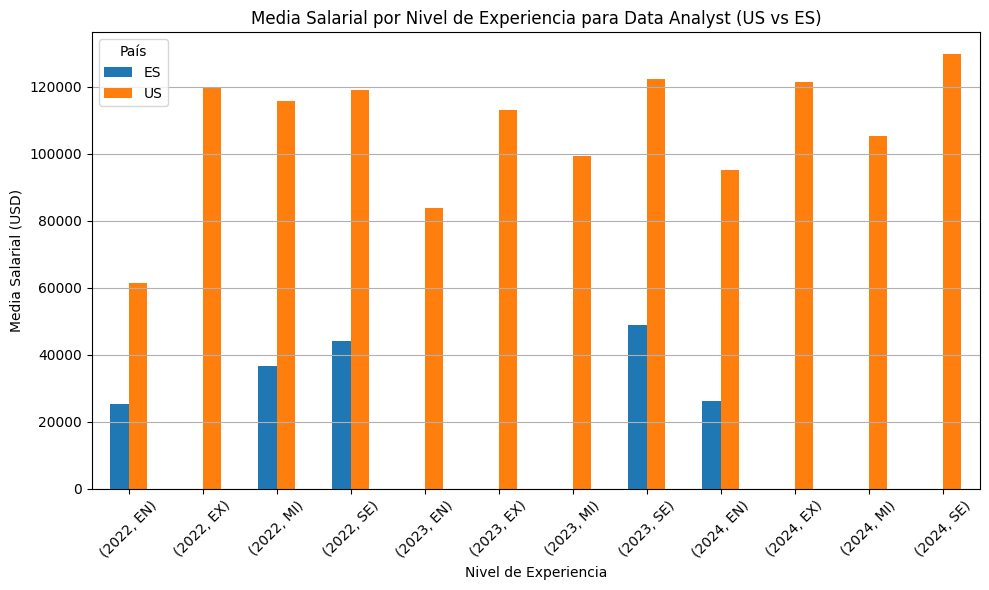

In [28]:
import matplotlib.pyplot as plt

# Filtrar el conjunto de datos para Data Analyst, US y ES, y los años 2022, 2023 y 2024
data_analyst_us_es = data_2022_2024[(data_2022_2024['job_title'] == 'Data Analyst') &
                                    (data_2022_2024['employee_residence'].isin(['US', 'ES'])) &
                                    (data_2022_2024['work_year'].isin([2022, 2023, 2024]))]

# Calcular la media salarial por nivel de experiencia y país
media_salarios_por_nivel_experiencia_y_pais = data_analyst_us_es.groupby(['work_year', 'experience_level', 'employee_residence'])['salary_in_usd'].mean().unstack()

# Graficar los resultados
media_salarios_por_nivel_experiencia_y_pais.plot(kind='bar', figsize=(10, 6))
plt.title('Media Salarial por Nivel de Experiencia para Data Analyst (US vs ES)')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Media Salarial (USD)')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



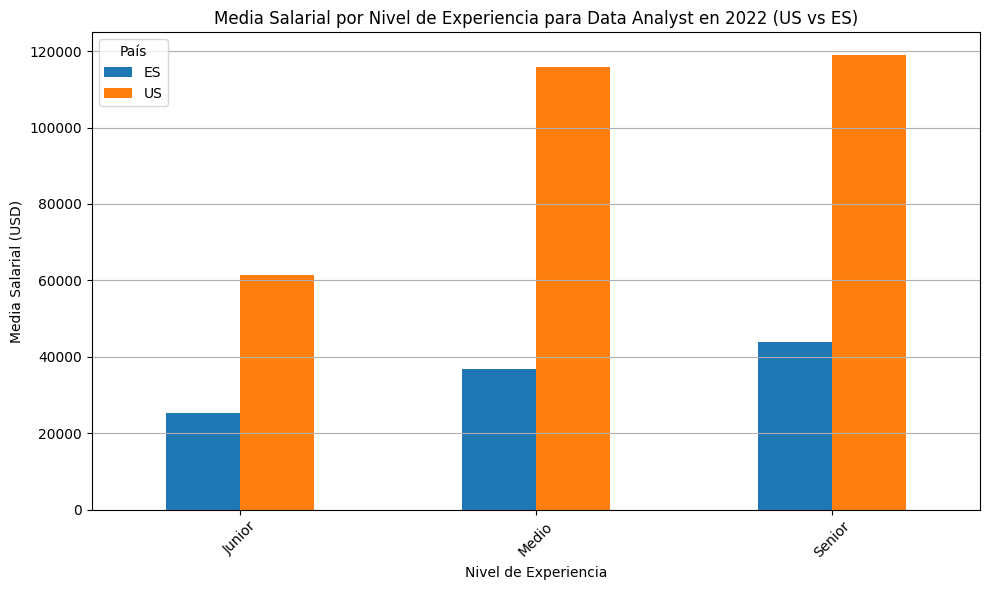

In [29]:
import matplotlib.pyplot as plt

# Filtrar el conjunto de datos para Data Analyst, US y ES, solo para el año 2022 y los niveles de experiencia EN, MI y SE
data_analyst_2022_us_es = data_2022_2024[(data_2022_2024['job_title'] == 'Data Analyst') &
                                          (data_2022_2024['employee_residence'].isin(['US', 'ES'])) &
                                          (data_2022_2024['work_year'] == 2022) &
                                          (data_2022_2024['experience_level'].isin(['EN', 'MI', 'SE']))]

# Calcular la media salarial por nivel de experiencia y país
media_salarios_por_nivel_experiencia_y_pais_2022 = data_analyst_2022_us_es.groupby(['experience_level', 'employee_residence'])['salary_in_usd'].mean().unstack()

# Graficar los resultados
media_salarios_por_nivel_experiencia_y_pais_2022.plot(kind='bar', figsize=(10, 6))
plt.title('Media Salarial por Nivel de Experiencia para Data Analyst en 2022 (US vs ES)')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Media Salarial (USD)')
plt.xticks(ticks=[0, 1, 2], labels=['Junior', 'Medio', 'Senior'], rotation=45)  # Cambiar los títulos del eje X
plt.legend(title='País')
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [30]:
# Filtrar el conjunto de datos para incluir solo datos de US
data_us = data_2022_2024[data_2022_2024['employee_residence'] == 'US']

# Agrupar los datos por puesto, tipo de empresa y nivel de experiencia, y calcular el salario medio
salarios_medios_us = data_us.groupby(['job_title', 'company_size', 'experience_level'])['salary_in_usd'].mean().round(2)

# Mostrar los resultados
print(salarios_medios_us)


job_title                  company_size  experience_level
Data Analyst               L             EN                   68362.50
                                         MI                   95875.00
                                         SE                  143033.33
                           M             EN                   91627.69
                                         EX                  116840.91
                                         MI                  103536.52
                                         SE                  123431.70
                           S             EN                   44660.00
                                         MI                   58000.00
                                         SE                  106250.00
Data Engineer              L             EN                   96250.00
                                         MI                  142150.40
                                         SE                  164628.32
                   

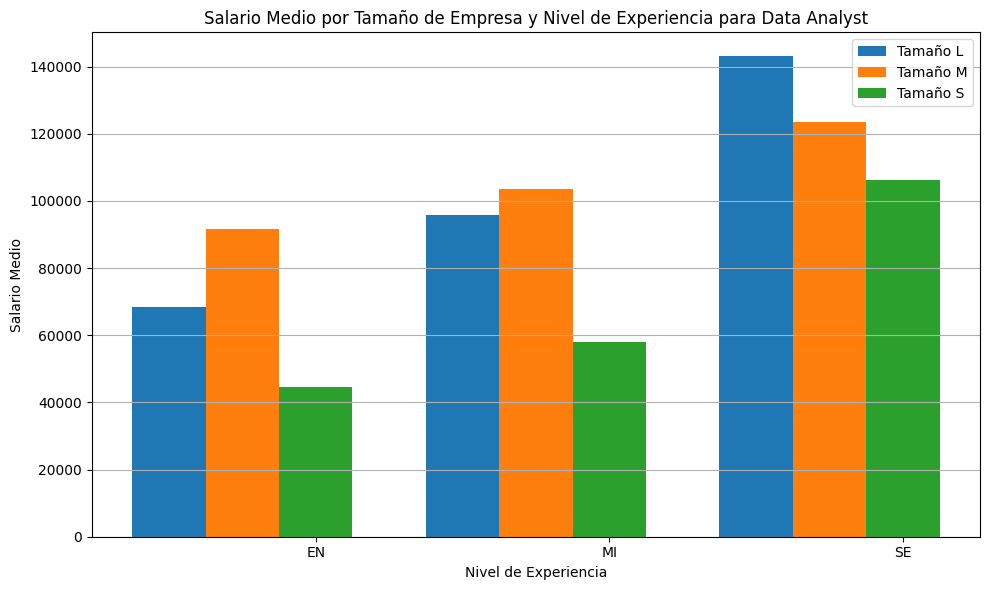

In [31]:
import matplotlib.pyplot as plt

# Datos proporcionados
salarios = {
    ('Data Analyst', 'L', 'EN'): 68362.50,
    ('Data Analyst', 'L', 'MI'): 95875.00,
    ('Data Analyst', 'L', 'SE'): 143033.33,
    ('Data Analyst', 'M', 'EN'): 91627.69,
    ('Data Analyst', 'M', 'MI'): 103536.52,
    ('Data Analyst', 'M', 'SE'): 123431.70,
    ('Data Analyst', 'S', 'EN'): 44660.00,
    ('Data Analyst', 'S', 'MI'): 58000.00,
    ('Data Analyst', 'S', 'SE'): 106250.00,
}

# Preparar los datos para la gráfica
tamaños_empresa = ['L', 'M', 'S']
niveles_experiencia = ['EN', 'MI', 'SE']

salarios_por_tamaño_empresa = {tamaño: [] for tamaño in tamaños_empresa}

for tamaño_empresa in tamaños_empresa:
    for nivel_experiencia in niveles_experiencia:
        if nivel_experiencia != 'EX':
            salario = salarios[('Data Analyst', tamaño_empresa, nivel_experiencia)]
            salarios_por_tamaño_empresa[tamaño_empresa].append(salario)

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(tamaños_empresa))

for i, tamaño_empresa in enumerate(tamaños_empresa):
    ax.bar([pos + i * bar_width for pos in index], salarios_por_tamaño_empresa[tamaño_empresa], 
           bar_width, label=f'Tamaño {tamaño_empresa}')

ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salario Medio')
ax.set_title('Salario Medio por Tamaño de Empresa y Nivel de Experiencia para Data Analyst')
ax.set_xticks([pos + 0.5 for pos in index])
ax.set_xticklabels(niveles_experiencia)
ax.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.show()



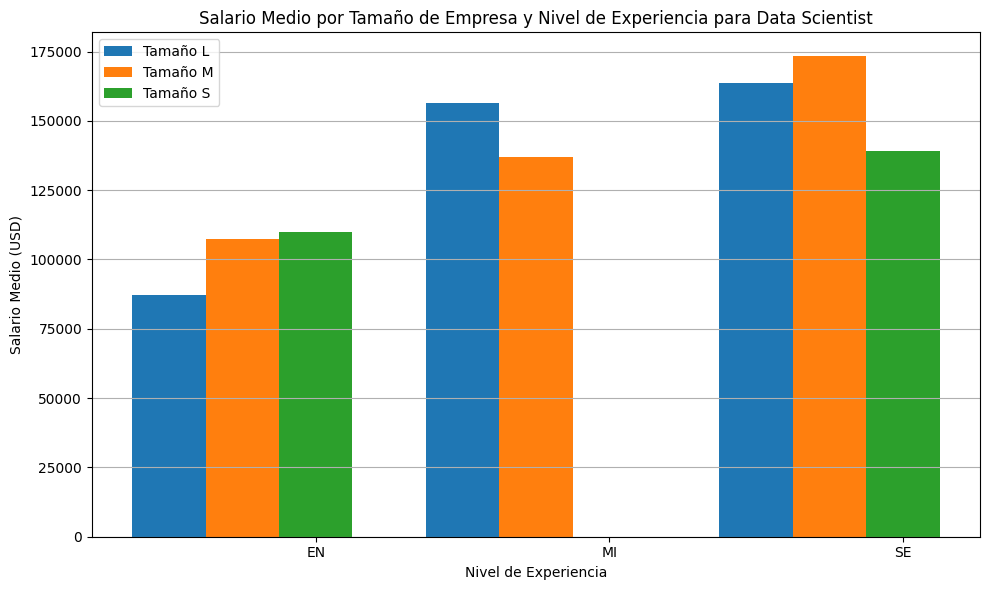

In [32]:
import matplotlib.pyplot as plt

# Datos proporcionados para Data Scientist (ajustados)
salarios_data_scientist = {
    ('Data Scientist', 'L', 'EN'): 87333.33,
    ('Data Scientist', 'L', 'MI'): 156347.06,
    ('Data Scientist', 'L', 'SE'): 163609.60,
    ('Data Scientist', 'M', 'EN'): 107435.58,
    ('Data Scientist', 'M', 'MI'): 136887.43,
    ('Data Scientist', 'M', 'SE'): 173268.85,
    ('Data Scientist', 'S', 'EN'): 110000.00,
    ('Data Scientist', 'S', 'SE'): 139250.00,
}

# Preparar los datos para la gráfica
tamaños_empresa = ['L', 'M', 'S']
niveles_experiencia = ['EN', 'MI', 'SE']

salarios_por_tamaño_empresa_data_scientist = {tamaño: [] for tamaño in tamaños_empresa}

for tamaño_empresa in tamaños_empresa:
    for nivel_experiencia in niveles_experiencia:
        salario = salarios_data_scientist.get(('Data Scientist', tamaño_empresa, nivel_experiencia), 0)
        salarios_por_tamaño_empresa_data_scientist[tamaño_empresa].append(salario)

# Crear la gráfica de barras para Data Scientist sin incluir el nivel "EX"
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(tamaños_empresa))

for i, tamaño_empresa in enumerate(tamaños_empresa):
    ax.bar([pos + i * bar_width for pos in index], salarios_por_tamaño_empresa_data_scientist[tamaño_empresa][:3], 
           bar_width, label=f'Tamaño {tamaño_empresa}')

ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salario Medio (USD)')
ax.set_title('Salario Medio por Tamaño de Empresa y Nivel de Experiencia para Data Scientist')
ax.set_xticks([pos + 0.5 for pos in index])
ax.set_xticklabels(niveles_experiencia)
ax.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.show()


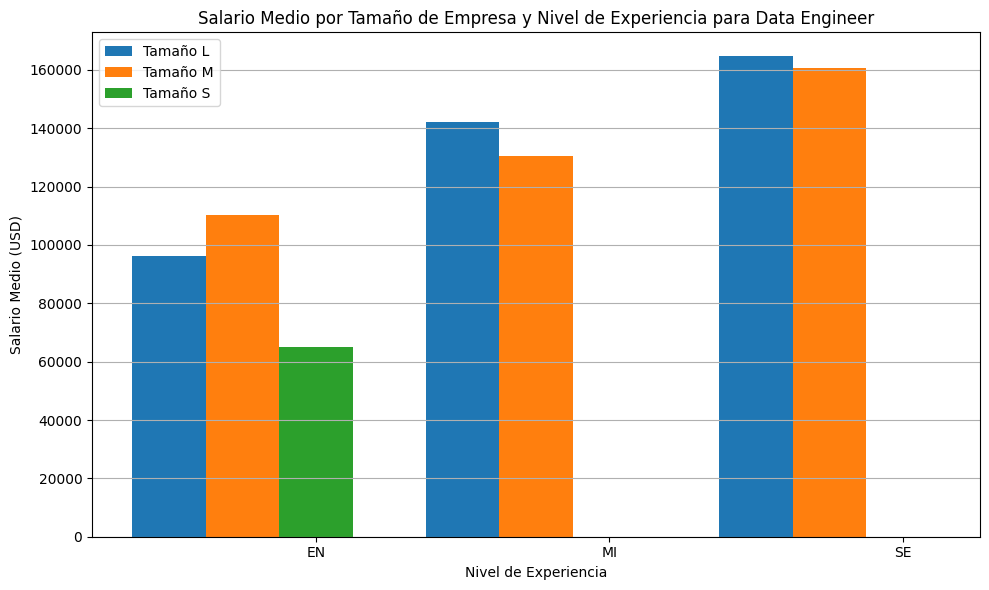

In [33]:
import matplotlib.pyplot as plt

# Datos proporcionados para Data Engineer (ajustados)
salarios_data_engineer = {
    ('Data Engineer', 'L', 'EN'): 96250.00,
    ('Data Engineer', 'L', 'MI'): 142150.40,
    ('Data Engineer', 'L', 'SE'): 164628.32,
    ('Data Engineer', 'M', 'EN'): 110319.91,
    ('Data Engineer', 'M', 'MI'): 130342.99,
    ('Data Engineer', 'M', 'SE'): 160537.15,
    ('Data Engineer', 'S', 'EN'): 65000.00,
}

# Preparar los datos para la gráfica
tamaños_empresa = ['L', 'M', 'S']
niveles_experiencia = ['EN', 'MI', 'SE']

salarios_por_tamaño_empresa_data_engineer = {tamaño: [] for tamaño in tamaños_empresa}

for tamaño_empresa in tamaños_empresa:
    for nivel_experiencia in niveles_experiencia:
        salario = salarios_data_engineer.get(('Data Engineer', tamaño_empresa, nivel_experiencia), 0)
        salarios_por_tamaño_empresa_data_engineer[tamaño_empresa].append(salario)

# Crear la gráfica de barras para Data Engineer sin incluir el nivel "EX"
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(tamaños_empresa))

for i, tamaño_empresa in enumerate(tamaños_empresa):
    ax.bar([pos + i * bar_width for pos in index], salarios_por_tamaño_empresa_data_engineer[tamaño_empresa], 
           bar_width, label=f'Tamaño {tamaño_empresa}')

ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salario Medio (USD)')
ax.set_title('Salario Medio por Tamaño de Empresa y Nivel de Experiencia para Data Engineer')
ax.set_xticks([pos + 0.5 for pos in index])
ax.set_xticklabels(niveles_experiencia)
ax.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.show()


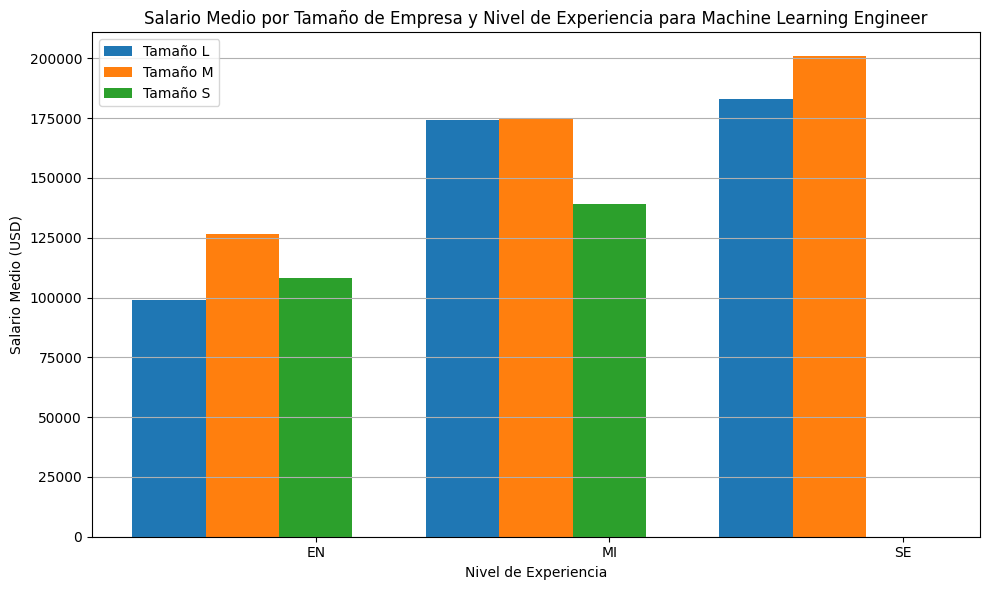

In [34]:
import matplotlib.pyplot as plt

# Datos proporcionados para Machine Learning Engineer (ajustados)
salarios_ml_engineer = {
    ('Machine Learning Engineer', 'L', 'EN'): 99000.00,
    ('Machine Learning Engineer', 'L', 'MI'): 174200.00,
    ('Machine Learning Engineer', 'L', 'SE'): 182855.00,
    ('Machine Learning Engineer', 'M', 'EN'): 126647.71,
    ('Machine Learning Engineer', 'M', 'MI'): 174593.39,
    ('Machine Learning Engineer', 'M', 'SE'): 200845.66,
    ('Machine Learning Engineer', 'S', 'EN'): 108000.00,
    ('Machine Learning Engineer', 'S', 'MI'): 139000.00,
}

# Preparar los datos para la gráfica
tamaños_empresa = ['L', 'M', 'S']
niveles_experiencia = ['EN', 'MI', 'SE']

salarios_por_tamaño_empresa_ml_engineer = {tamaño: [] for tamaño in tamaños_empresa}

for tamaño_empresa in tamaños_empresa:
    for nivel_experiencia in niveles_experiencia:
        salario = salarios_ml_engineer.get(('Machine Learning Engineer', tamaño_empresa, nivel_experiencia), 0)
        salarios_por_tamaño_empresa_ml_engineer[tamaño_empresa].append(salario)

# Crear la gráfica de barras para Machine Learning Engineer sin incluir el nivel "EX"
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(tamaños_empresa))

for i, tamaño_empresa in enumerate(tamaños_empresa):
    ax.bar([pos + i * bar_width for pos in index], salarios_por_tamaño_empresa_ml_engineer[tamaño_empresa], 
           bar_width, label=f'Tamaño {tamaño_empresa}')

ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salario Medio (USD)')
ax.set_title('Salario Medio por Tamaño de Empresa y Nivel de Experiencia para Machine Learning Engineer')
ax.set_xticks([pos + 0.5 for pos in index])
ax.set_xticklabels(niveles_experiencia)
ax.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [35]:
# Filtrar el conjunto de datos para incluir solo datos de España
data_es = data_2022_2024[data_2022_2024['employee_residence'] == 'ES']

# Agrupar los datos por puesto, tipo de empresa y nivel de experiencia, y calcular el salario medio
salarios_medios_es = data_es.groupby(['job_title', 'company_size', 'experience_level'])['salary_in_usd'].mean().round(2)

# Mostrar los resultados
print(salarios_medios_es)


job_title                  company_size  experience_level
Data Analyst               L             EN                   25216.00
                           M             EN                   26110.50
                                         MI                   36773.00
                                         SE                   46117.21
Data Engineer              L             EN                   41027.00
                           M             MI                   72896.33
                                         SE                   69619.82
Data Scientist             L             MI                   64781.00
                                         SE                   88256.00
                           M             EN                   35339.00
                                         MI                   53983.50
                                         SE                   45504.33
Machine Learning Engineer  L             MI                   38868.00
                   

In [36]:
# 1. Filtrar los datos para Data Analyst en Estados Unidos
data_da_us = data[(data['job_title'] == 'Data Analyst') & (data['employee_residence'] == 'US')]

# 2. Dividir los datos en tres grupos: sin trabajo remoto, parcialmente remoto y totalmente remoto
sin_remoto = data_da_us[data_da_us['remote_ratio'] == 0]
parcialmente_remoto = data_da_us[data_da_us['remote_ratio'] == 50]
totalmente_remoto = data_da_us[data_da_us['remote_ratio'] == 100]

# 3. Calcular el salario promedio para cada grupo
salario_promedio_sin_remoto = sin_remoto['salary_in_usd'].mean()
salario_promedio_parcialmente_remoto = parcialmente_remoto['salary_in_usd'].mean()
salario_promedio_totalmente_remoto = totalmente_remoto['salary_in_usd'].mean()

# Imprimir los resultados
print("Salario promedio para sin trabajo remoto:", salario_promedio_sin_remoto)
print("Salario promedio para parcialmente remoto:", salario_promedio_parcialmente_remoto)
print("Salario promedio para totalmente remoto:", salario_promedio_totalmente_remoto)


Salario promedio para sin trabajo remoto: 112314.88721207307
Salario promedio para parcialmente remoto: 66666.66666666667
Salario promedio para totalmente remoto: 112003.35931307793


In [37]:
# 1. Filtrar los datos para Data Scientist en Estados Unidos
data_da_us = data[(data['job_title'] == 'Data Scientist') & (data['employee_residence'] == 'US')]

# 2. Dividir los datos en tres grupos: sin trabajo remoto, parcialmente remoto y totalmente remoto
sin_remoto = data_da_us[data_da_us['remote_ratio'] == 0]
parcialmente_remoto = data_da_us[data_da_us['remote_ratio'] == 50]
totalmente_remoto = data_da_us[data_da_us['remote_ratio'] == 100]

# 3. Calcular el salario promedio para cada grupo
salario_promedio_sin_remoto = sin_remoto['salary_in_usd'].mean()
salario_promedio_parcialmente_remoto = parcialmente_remoto['salary_in_usd'].mean()
salario_promedio_totalmente_remoto = totalmente_remoto['salary_in_usd'].mean()

# Imprimir los resultados
print("Salario promedio para sin trabajo remoto:", salario_promedio_sin_remoto)
print("Salario promedio para parcialmente remoto:", salario_promedio_parcialmente_remoto)
print("Salario promedio para totalmente remoto:", salario_promedio_totalmente_remoto)


Salario promedio para sin trabajo remoto: 163849.39028475713
Salario promedio para parcialmente remoto: 105222.22222222222
Salario promedio para totalmente remoto: 162004.36590662322


In [38]:
# 1. Filtrar los datos para Data Engineer en Estados Unidos
data_da_us = data[(data['job_title'] == 'Data Engineer') & (data['employee_residence'] == 'US')]

# 2. Dividir los datos en tres grupos: sin trabajo remoto, parcialmente remoto y totalmente remoto
sin_remoto = data_da_us[data_da_us['remote_ratio'] == 0]
parcialmente_remoto = data_da_us[data_da_us['remote_ratio'] == 50]
totalmente_remoto = data_da_us[data_da_us['remote_ratio'] == 100]

# 3. Calcular el salario promedio para cada grupo
salario_promedio_sin_remoto = sin_remoto['salary_in_usd'].mean()
salario_promedio_parcialmente_remoto = parcialmente_remoto['salary_in_usd'].mean()
salario_promedio_totalmente_remoto = totalmente_remoto['salary_in_usd'].mean()

# Imprimir los resultados
print("Salario promedio para sin trabajo remoto:", salario_promedio_sin_remoto)
print("Salario promedio para parcialmente remoto:", salario_promedio_parcialmente_remoto)
print("Salario promedio para totalmente remoto:", salario_promedio_totalmente_remoto)


Salario promedio para sin trabajo remoto: 153241.22685656155
Salario promedio para parcialmente remoto: 90000.0
Salario promedio para totalmente remoto: 154971.10520607376


In [39]:
# 1. Filtrar los datos para Machine Learning Engineer en Estados Unidos
data_da_us = data[(data['job_title'] == 'Machine Learning Engineer') & (data['employee_residence'] == 'US')]

# 2. Dividir los datos en tres grupos: sin trabajo remoto, parcialmente remoto y totalmente remoto
sin_remoto = data_da_us[data_da_us['remote_ratio'] == 0]
parcialmente_remoto = data_da_us[data_da_us['remote_ratio'] == 50]
totalmente_remoto = data_da_us[data_da_us['remote_ratio'] == 100]

# 3. Calcular el salario promedio para cada grupo
salario_promedio_sin_remoto = sin_remoto['salary_in_usd'].mean()
salario_promedio_parcialmente_remoto = parcialmente_remoto['salary_in_usd'].mean()
salario_promedio_totalmente_remoto = totalmente_remoto['salary_in_usd'].mean()

# Imprimir los resultados
print("Salario promedio para sin trabajo remoto:", salario_promedio_sin_remoto)
print("Salario promedio para parcialmente remoto:", salario_promedio_parcialmente_remoto)
print("Salario promedio para totalmente remoto:", salario_promedio_totalmente_remoto)


Salario promedio para sin trabajo remoto: 196930.73752310537
Salario promedio para parcialmente remoto: 162142.85714285713
Salario promedio para totalmente remoto: 191875.4516129032


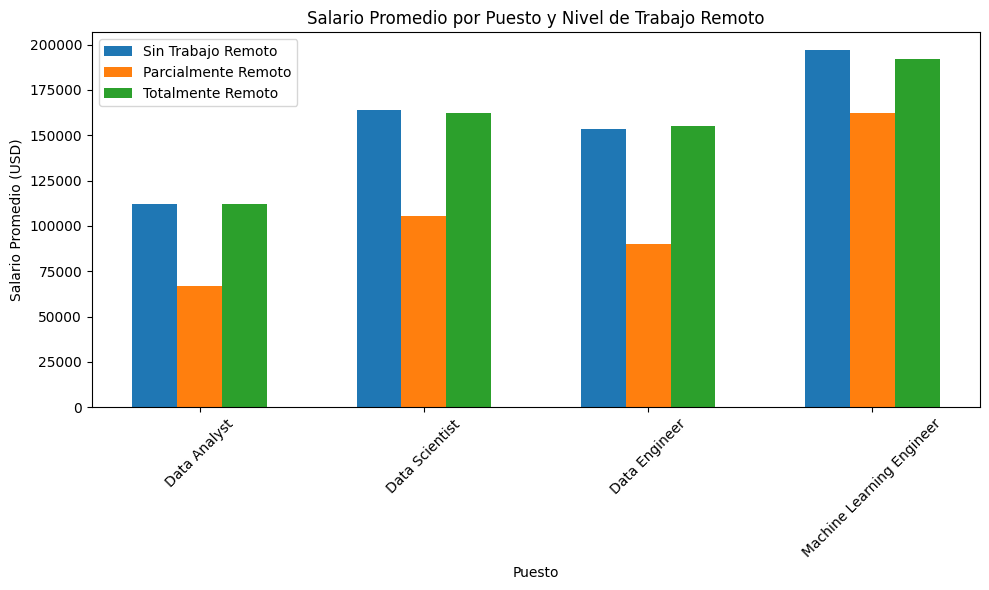

In [40]:
import matplotlib.pyplot as plt

# Datos proporcionados
puestos = ['Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer']
sin_remoto = [112314.88721207307, 163849.39028475713, 153241.22685656155, 196930.73752310537]
parcialmente_remoto = [66666.66666666667, 105222.22222222222, 90000.0, 162142.85714285713]
totalmente_remoto = [112003.35931307793, 162004.36590662322, 154971.10520607376, 191875.4516129032]

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Definir posiciones de las barras
posiciones = range(len(puestos))

# Dibujar las barras para cada categoría de trabajo remoto
ax.bar([p - 0.2 for p in posiciones], sin_remoto, width=0.2, label='Sin Trabajo Remoto')
ax.bar(posiciones, parcialmente_remoto, width=0.2, label='Parcialmente Remoto')
ax.bar([p + 0.2 for p in posiciones], totalmente_remoto, width=0.2, label='Totalmente Remoto')

# Etiquetas y título
ax.set_xlabel('Puesto')
ax.set_ylabel('Salario Promedio (USD)')
ax.set_title('Salario Promedio por Puesto y Nivel de Trabajo Remoto')
ax.set_xticks(posiciones)
ax.set_xticklabels(puestos)
ax.legend()

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
